### Imports

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Pulling in the Data

In [2]:
#Checking the working directory to see file path
os.getcwd()

'/Users/eric/Documents/Graduate School/DSC630/Assignments/Week 8'

In [3]:
#importing my data and naming it df. Data received from Blackboard Week 3 assignment
df = pd.read_csv("us_retail_sales.csv",index_col=False)

In [4]:
#Looking at the first 5 rows of the dataframe
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


### Plot the data with proper labeling and make some observations on the graph.

In [5]:
#Creating a list out of the column headers in case I need to make sweeping changes to col names later
colList = df.columns
colList

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')

In [6]:
#Getting rid of the YEAR column so nothing changes with that
colListMinusYear = colList[1:]

In [7]:
#Viewing the new list
colListMinusYear

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')

In [8]:
#Adding a new column showing the total retail sales for that given year
df['Total'] = df[colListMinusYear].sum(axis=1)

Text(0.5, 1.0, 'Retail Sales Over Time')

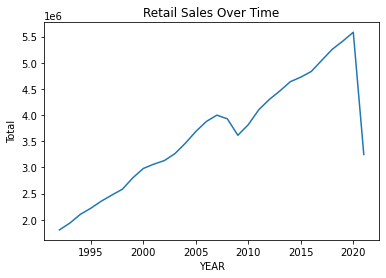

In [9]:
#Plotting the total (new column from previous line) using seaborn
sns.lineplot(data=df, x="YEAR", y="Total").set_title("Retail Sales Over Time")

Observations:

Retail sales have gradually gone up since the beginning of the when the data was recorded. There are blips in the line that can be explained by economic conditions. The dip down in 2008 can be explained by the economic meltdown caused by subprime mortgage lending, while in 2020 the steep drop can be explained by Covid spreading throughout the world. Aside from that, retail sales have been on a gradual incline.

In [10]:
rowNumber = df.shape[0]
colNumber = df.shape[1]
print(rowNumber,colNumber)

30 14


### Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [11]:
#Dropping the total column that I added above
df = df.drop("Total",axis=1)

In [12]:
#Taking a look at the data again
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [13]:
#Making sure this list from above is what I think it is
colListMinusYear

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')

In [14]:
#Melting the dataframe to reduce the columns
df = pd.melt(df, id_vars=['YEAR'], value_vars=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG',
                                               'SEP','OCT','NOV','DEC'])

In [15]:
#Looking at this to make sure the .melt did what I think it did
df

,YEAR,variable,value
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0
...,...,...,...
355,2017,DEC,433282.0
356,2018,DEC,434803.0
357,2019,DEC,458055.0
358,2020,DEC,484782.0


In [16]:
#Importing a library to change month abbreviations 
from calendar import month_abbr

In [17]:
#using the new library
lower_ma = [m.lower() for m in month_abbr]

In [18]:
#Changing the 3 letter month abbreviation to a number
df['variable'] = df['variable'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [19]:
#Renaming the 'variable' column to Month
df = df.rename(columns={'variable':'MONTH'})

In [20]:
#Creating a new column out of the year and month columns, defaulting the day to the first of the month
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

In [21]:
#Dropping the previous columns now that I have a new column
df = df.drop(['YEAR','MONTH'],axis=1)

In [22]:
#Reducing the dataframe to two columns, Date and Value
df = df[['DATE','value']]

In [23]:
#Sorting the dataframe by date
df = df.sort_values(by='DATE')

In [24]:
#Looking at the new dataframe
df

,DATE,value
0,1992-01-01,146925.0
30,1992-02-01,147223.0
60,1992-03-01,146805.0
90,1992-04-01,148032.0
120,1992-05-01,149010.0
...,...,...
239,2021-08-01,NaN
269,2021-09-01,NaN
299,2021-10-01,NaN
329,2021-11-01,NaN


In [25]:
#Resetting the index 
df = df.reset_index()

In [26]:
#Dropping the index column
df = df.drop(['index'],axis=1)

In [27]:
#Looking at the dataframe again
df

,DATE,value
0,1992-01-01,146925.0
1,1992-02-01,147223.0
2,1992-03-01,146805.0
3,1992-04-01,148032.0
4,1992-05-01,149010.0
...,...,...
355,2021-08-01,NaN
356,2021-09-01,NaN
357,2021-10-01,NaN
358,2021-11-01,NaN


In [28]:
#Dropping the NaN values
df = df.dropna()

In [29]:
#Splitting the total dataframe into a training and testing set manually -- ordinarily I would use sklearn
dfTrain = df.iloc[:-12]
dfTest = df.iloc[-12:]

In [30]:
#Looking at Training set
dfTrain

,DATE,value
0,1992-01-01,146925.0
1,1992-02-01,147223.0
2,1992-03-01,146805.0
3,1992-04-01,148032.0
4,1992-05-01,149010.0
...,...,...
337,2020-02-01,459610.0
338,2020-03-01,434281.0
339,2020-04-01,379892.0
340,2020-05-01,444631.0


In [31]:
#Looking at test set
dfTest

,DATE,value
342,2020-07-01,481627.0
343,2020-08-01,483716.0
344,2020-09-01,493327.0
345,2020-10-01,493991.0
346,2020-11-01,488652.0
347,2020-12-01,484782.0
348,2021-01-01,520162.0
349,2021-02-01,504458.0
350,2021-03-01,559871.0
351,2021-04-01,562269.0


### Use the training set to build a predictive model for the monthly retail sales.

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
#Defining the y variable 
y = dfTrain['value']

In [34]:
#Initializing the model- using the SARIMAX model -- originally was going to use ARIMA but switched
model = SARIMAX(y, order = (1, 0, 1))

In [35]:
#fitting the model
model = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49769D+03    |proj g|=  3.04943D+03

At iterate    5    f=  2.32981D+01    |proj g|=  2.53060D+01

At iterate   10    f=  1.13904D+01    |proj g|=  1.04930D+00

At iterate   15    f=  1.02718D+01    |proj g|=  9.82465D-02

At iterate   20    f=  1.01376D+01    |proj g|=  1.75595D-02

At iterate   25    f=  1.01213D+01    |proj g|=  8.24380D-03

At iterate   30    f=  1.01203D+01    |proj g|=  1.16329D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/eric/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


### Use the model to predict the monthly retail sales on the last year of data.

In [36]:
#Making the prediction
yPrediction = model.get_forecast(len(dfTest.index))

In [37]:
#I'll admit that I saw this piece online -- creates a range that I thought would be cool
yPredictionDf = yPrediction.conf_int(alpha = 0.05)

In [38]:
#Making the prediction and setting the start/end variables
yPredictionDf["predict"] = model.predict(start = yPredictionDf.index[0], end = yPredictionDf.index[-1])

In [39]:
#Showing the prediction data
yPredictionDf

,lower value,upper value,predict
342,464906.925792,488006.869896,476456.897844
343,460008.450261,492769.166252,476388.808257
344,456241.090860,496400.365941,476320.728401
345,453057.205863,499448.110684,476252.658273
346,450245.676435,502123.519312,476184.597874
347,447698.458712,504534.635689,476116.547201
348,445351.448618,506745.563887,476048.506253
349,443162.912069,508798.037988,475980.475028
350,441103.876452,510721.030600,475912.453526
351,439153.255387,512535.628102,475844.441745


### Report the RMSE of the model predictions on the test set.

In [40]:
#importing the mean squared error 
from sklearn.metrics import mean_squared_error
import numpy as np

In [41]:
#Using the mean squared error method from the sklearn library
rmse = mean_squared_error(dfTest['value'], yPredictionDf['predict'], squared=False)

In [42]:
rmse

49316.86825188333

This was a pretty tough assignment. Figuring out how to melt down the dataframe to combine the variables was a huge breakthrough. Splitting the dataframe manually was also something I wasn't used to, so that was nice to get some experience on that. Ultimately, we found the RMSE which came in at just under 50,000.